In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as ss
from collections import Counter

In [2]:
def exp_win_prob(dr):
    return 1 / (10 ** (-dr / 400) + 1)

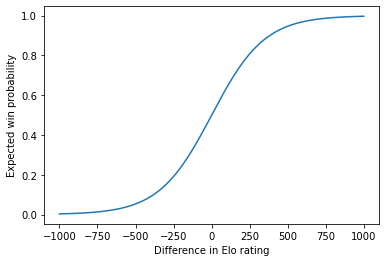

In [3]:
x = np.arange(-1000, 1000)

fig, ax = plt.subplots(facecolor = 'white', figsize=(6,4))
ax.plot(x, exp_win_prob(x))
ax.set_xlabel('Difference in Elo rating')
ax.set_ylabel('Expected win probability')
fig.savefig('elo_expected_win_prob', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
exp_win_prob(2107 - 1600)

0.9487547111474991

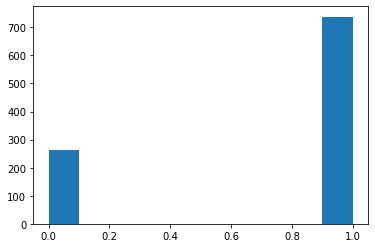

In [5]:
a = ss.bernoulli.rvs(0.75, size=1000)

plt.hist(a)
plt.show()

In [6]:
def play_soccer_match(team_a, team_b, team_a_elo, team_b_elo, seed=42, verbose=False):
    #calculate team_a win probability
    dr = team_a_elo - team_b_elo
    team_a_win_prob = 1 / (10 ** (-dr / 400) + 1)
    
    #seed random number generator
    #draw a random sample from a uniform distribution between 0 and 1
    np.random.seed(seed)
    n = np.random.rand()
    
    #determine winner
    if n <= team_a_win_prob:
        winner = team_a
        loser = team_b
    else:
        winner = team_b
        loser = team_a
        
    #print results if flagged
    if verbose:
        print(f"{team_a} win probability: {round(team_a_win_prob, 3)}")
        print(f"{winner} beats {loser}!!!")
        
    return winner
            
game_winner = play_soccer_match("Belgium", "France", 2107, 2083, verbose=True)

Belgium win probability: 0.534
Belgium beats France!!!


Counter({'Belgium': 5295, 'France': 4705})


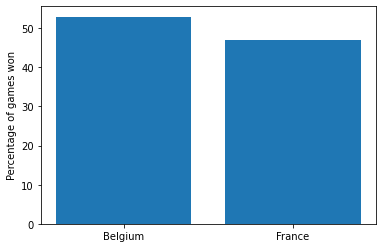

In [55]:
all_match_winners = [play_soccer_match("Belgium", "France", 2107, 2083, seed=i) for i in range(10000)]

a = Counter(all_match_winners)
print(a)

total = sum(a.values(), 0.0)
for key in a:
    a[key] /= (total / 100)

fig, ax = plt.subplots(facecolor='white')
ax.bar(*zip(*sorted(a.items(), key=lambda x: x[1], reverse=True)))
ax.set_ylabel('Percentage of games won')
fig.savefig('../figures/belgium_france_sims', dpi=300, bbox_inches='tight')
plt.show()

Counter({'Belgium': 9489, 'North Macedonia': 511})


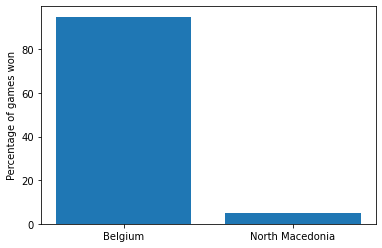

In [7]:
many_games = [play_soccer_match("Belgium", "North Macedonia", 2107, 1600, seed=i) for i in range(10000)]

a = Counter(many_games)
print(a)

total = sum(a.values(), 0.0)
for key in a:
    a[key] /= (total / 100)

fig, ax = plt.subplots(facecolor='white')
ax.bar(*zip(*sorted(a.items(), key=lambda x: x[1], reverse=True)))
ax.set_ylabel('Percentage of games won')
fig.savefig('../figures/belgium_macedonia_sims', dpi=300, bbox_inches='tight')
plt.show()

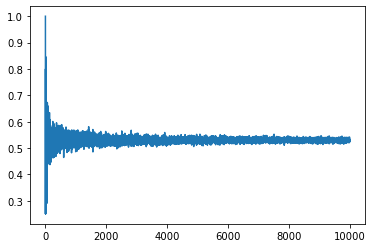

In [8]:
n = np.arange(1, 10001)

wins = [np.mean(ss.bernoulli.rvs(0.53, size=i)) for i in n]
plt.plot(n, wins)
plt.show()

In [11]:
def d_elo(k, elo_a, elo_b, win_loss):
    return k * (win_loss - exp_win_prob(elo_a-elo_b))

d_elo(50, 1600, 2107, 1)

47.43773555737496

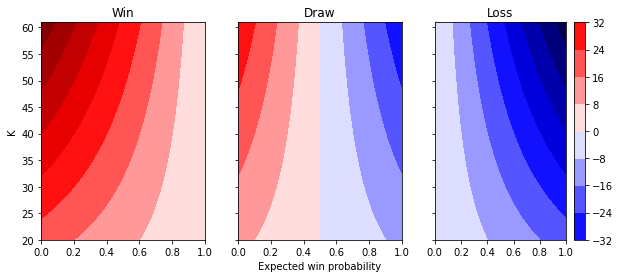

In [32]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def f(k, we, win_loss):
    return k * (win_loss - we)

we = np.arange(0, 1.0001, 1/1000)
k = np.arange(20, 61, 40/1000)

X, Y = np.meshgrid(k, we)
Z1 = f(X, Y, 1)
Z2 = f(X, Y, 0.5)
Z3 = f(X, Y, 0)

Zs = np.concatenate([Z1, Z2, Z3], axis=0)
min_, max_ = Zs.min(), Zs.max()

fig, ax = plt.subplots(1, 3, facecolor='white', sharex=True, sharey=True, figsize=(10,4))
ax0 = ax[0].contourf(Y, X, Z1, vmin=-60, vmax=60, cmap='seismic')
ax1 = ax[1].contourf(Y, X, Z2, vmin=-60, vmax=60, cmap='seismic')
ax2 = ax[2].contourf(Y, X, Z3, vmin=-60, vmax=60, cmap='seismic')
ax[0].set_title('Win')
ax[1].set_title('Draw')
ax[2].set_title('Loss')
ax[1].set_xlabel('Expected win probability')
ax[0].set_ylabel('K')
fig.colorbar(ax1)
plt.show()

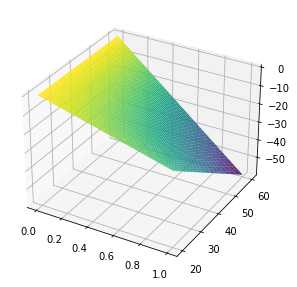

In [108]:
fig = plt.figure(facecolor='white')
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.tight_layout()
plt.show()

In [ ]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
 
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color ='green')
ax.set_title('wireframe geeks for geeks');